In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2

In [2]:
def create_plus_sign(size, line_thickness):
    target_intensity = np.zeros((size, size))
    center_x = size // 2
    center_y = size // 2
    
    # Horizontal line
    target_intensity[center_x - line_thickness//2 : center_x + line_thickness//2 + 1, :] = 0.001
    
    # Vertical line
    target_intensity[:, center_y - line_thickness//2 : center_y + line_thickness//2 + 1] = 0.001
    
    return target_intensity

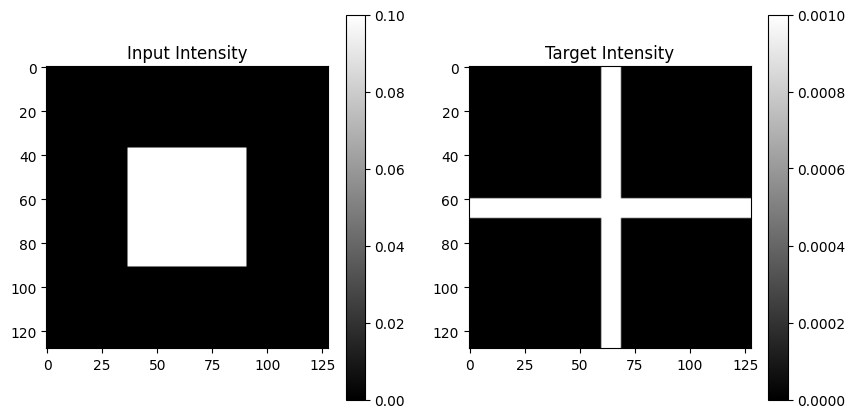

In [8]:
size = 128
wavelength = 2.14e-3
distance = 50e-3
grid_length = 50-3

# Create arrays for x and y values
x = np.linspace(-grid_length, grid_length, size)
y = np.linspace(-grid_length, grid_length, size)

# Create a meshgrid from x and y
X, Y = np.meshgrid(x, y)

# Create input and target intensity distributions
input_intensity = np.zeros((size, size))

# this is input attributes that might be used
center_x = size // 2
center_y = size // 2
sigma = size / 5
radius = size // 5

# this is gaussian input
# x, y = np.meshgrid(np.arange(size), np.arange(size))
# input_intensity = np.exp( - ((x - center_x)**2 + (y - center_y)**2) / (2 * radius**2) ) 
# input_intensity /= np.sum(input_intensity)

# this is circle input
# for i in range(size):
#     for j in range(size):
#         if (i - center_x)**2 + (j - center_y)**2 <= radius**2:
#             input_intensity[i, j] = 1

# this is square input
axis_range_x = (X >= -20) & (X <= 20)
axis_range_y = (Y >= -20) & (Y <= 20)
input_intensity[axis_range_x & axis_range_y] = 0.1

# target_intensity = np.zeros((size, size))
# width = size // 48
# center_x = size // 2
# center_y = size // 2
# target_intensity[center_x - width: center_x + width + 1, 6 : 11] = 0.001
# # target_intensity[center_x - width: center_x, 50: 78] = 1.0
# # target_intensity[20: 24, 24: 40] = 1.0
# target_intensity[6 : 11, center_y - width: center_y + width + 1] = 0.001
# # target_intensity[50: 78, center_y - width: center_y] = 1.0

line_thickness = size // 16
target_intensity = create_plus_sign(size, line_thickness)


# inverted_target_intensity = np.logical_not(target_intensity).astype(int)
# target_intensity = inverted_target_intensity

# Plot the input and target intensity distributions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_intensity, cmap='gray')
plt.title('Input Intensity')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(target_intensity, cmap='gray')
plt.title('Target Intensity')
plt.colorbar()

plt.show()
# print(input_intensity.shape())


In [17]:
k = 2 * np.pi / wavelength
Omega = 0.5
epsilon = 1e-10

def E_d(A, phi, x, y, x_prime, y_prime):
    r = np.sqrt((x - x_prime)**2 + (y - y_prime)**2) + epsilon 
    return A / r * np.exp(-1j * (k * r) + 1j * phi)

def E_i(E_d_values):
    return E_d_values * (1 + np.cos(Omega))

In [18]:
# def propagate(field, distance, wavelength, size, X, Y):
#     k = 2 * np.pi / wavelength
#     propagated_field = np.zeros((size, size), dtype=np.complex128)
    
#     for x_prime in range(size):
#         for y_prime in range(size):
#             r = np.sqrt((X - X[x_prime, y_prime])**2 + (Y - Y[x_prime, y_prime])**2 + distance**2)
#             H = (1 / r) * np.exp(-1j * k * r) * (1 + np.cos(np.arctan(distance / r)))
#             propagated_field[x_prime, y_prime] = np.sum(field * H)
    
#     return propagated_field

def propagate(field, distance, wavelength, size, X, Y):
    k = 2 * np.pi / wavelength
    propagated_field = np.zeros((size, size), dtype=np.complex128)
    
    for x_prime in range(size):
        for y_prime in range(size):
            r = np.sqrt((X - X[x_prime, y_prime])**2 + (Y - Y[x_prime, y_prime])**2 + distance**2) + epsilon
            H = (1 / r) * np.exp(-1j * k * r) * (1 + np.cos(np.arctan(distance / r)))
            propagated_field[x_prime, y_prime] = np.sum(field * H)
    
    return propagated_field

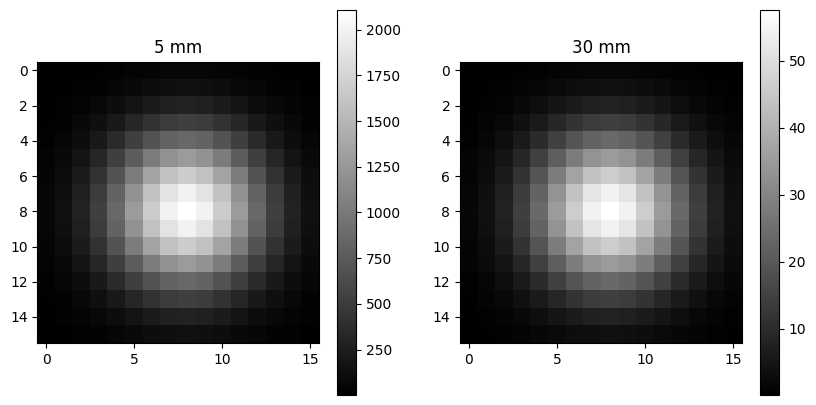

[[False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False Fal

In [19]:
input_phase = np.zeros((size, size))
input_field = np.sqrt(input_intensity) * np.exp(1j * input_phase)

# Propagate the input field over 5 mm and 15 mm
propagated_field_5mm = propagate(input_field, 5e-3, wavelength, size, X, Y)
propagated_field_15mm = propagate(input_field, 30e-3, wavelength, size, X, Y)

# Calculate the intensity distributions at 5 mm and 15 mm
intensity_5mm = np.abs(propagated_field_5mm)**2
intensity_15mm = np.abs(propagated_field_15mm)**2

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(intensity_5mm, cmap='gray')
plt.title('5 mm')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(intensity_15mm, cmap='gray')
plt.title('30 mm')
plt.colorbar()

plt.show()

print(intensity_5mm == intensity_15mm)

In [20]:
# def gerchberg_saxton(input_intensity, target_intensity, wavelength, distance, iterations=1000):
#     size = input_intensity.shape[0]
#     X, Y = np.meshgrid(np.linspace(-5, 5, size), np.linspace(-5, 5, size))
    
#     # Initialize the phase and field distributions
#     phase = np.random.rand(size, size)
#     input_field = np.sqrt(input_intensity) * np.exp(1j * phase)

#     for i in range(iterations):
#         # Forward propagation
#         output_field = propagate(input_field, distance, wavelength, size, X, Y)
        
#         # Enforce the target intensity pattern
#         output_phase = np.angle(output_field)
#         output_field = np.sqrt(target_intensity) * np.exp(1j * output_phase)
        
#         # Backward propagation
#         input_field = propagate(output_field, -distance, wavelength, size, X, Y)
        
#         # Enforce the input intensity pattern
#         input_phase = np.angle(input_field)
#         input_field = np.sqrt(input_intensity) * np.exp(1j * input_phase)

#     # Calculate the phase plate
#     phase_plate = np.angle(input_field)
    
#     return phase_plate

def gerchberg_saxton(input_intensity, target_intensity, wavelength, distance, iterations=100):
    size = input_intensity.shape[0]
    X, Y = np.meshgrid(np.linspace(-grid_length, grid_length, size), np.linspace(-grid_length, grid_length, size))
    
    # Initialize the phase and field distributions
    phase = np.random.rand(size, size)
    input_field = np.sqrt(input_intensity) * np.exp(1j * phase)

    for i in range(iterations):
        # Forward propagation
        E_d_values = np.zeros_like(input_field, dtype=complex)
        for x_prime in range(size):
            for y_prime in range(size):
                E_d_values[x_prime, y_prime] = E_d(np.sqrt(input_intensity[x_prime, y_prime]), phase[x_prime, y_prime], X[x_prime, y_prime], Y[x_prime, y_prime], X[x_prime, y_prime], Y[x_prime, y_prime])
        E_i_values = E_i(E_d_values)
        output_field = propagate(E_i_values, distance, wavelength, size, X, Y)
        
        # Enforce the target intensity pattern
        output_phase = np.angle(output_field)
        output_field = np.sqrt(target_intensity) * np.exp(1j * output_phase)
        
        # Backward propagation
        E_d_values = np.zeros_like(output_field, dtype=complex)
        for x_prime in range(size):
            for y_prime in range(size):
                E_d_values[x_prime, y_prime] = E_d(np.sqrt(target_intensity[x_prime, y_prime]), output_phase[x_prime, y_prime], X[x_prime, y_prime], Y[x_prime, y_prime], X[x_prime, y_prime], Y[x_prime, y_prime])
        E_i_values = E_i(E_d_values)
        input_field = propagate(E_i_values, -distance, wavelength, size, X, Y)
        
        # Enforce the input intensity pattern
        input_phase = np.angle(input_field)
        input_field = np.sqrt(input_intensity) * np.exp(1j * input_phase)

    # Calculate the phase plate
    phase_plate = np.angle(input_field)
    
    return phase_plate

In [21]:
phase_plate = gerchberg_saxton(propagated_field_5mm, target_intensity, wavelength, distance)


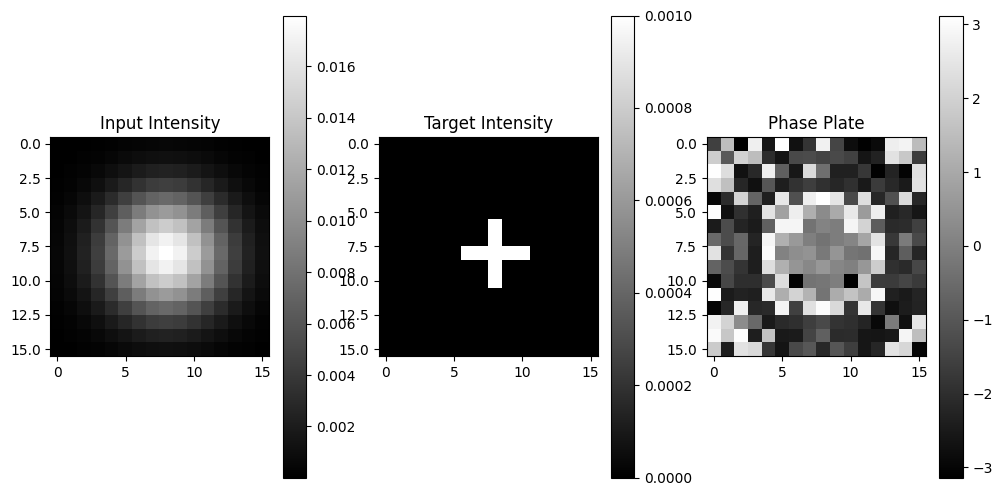

[[-1.54860264  1.49241997 -3.1374641   2.71619955 -2.58755823  3.12171714
  -2.72056819 -1.8468317   2.75968397 -1.43338958 -2.79997439 -3.10295573
  -2.89248915  2.68212993  2.81880987  1.46618947]
 [ 1.88648106 -0.94558843  2.00872285  1.50495376 -2.02885513 -2.66543434
  -1.31612521 -1.29647483 -1.47507747 -1.32161623 -1.53122837 -2.61154993
  -2.30419043  2.39741337  1.76862699 -1.62925092]
 [ 3.0847293   2.31002068 -2.70382125 -2.12980609  2.69134213 -0.80857317
  -2.56388491  2.20361559 -0.4107631  -2.32376387 -2.30902063 -1.770615
  -3.10084575 -2.27418565 -3.06314542  2.34458379]
 [ 2.33858331  1.57947375 -2.19446695 -2.73364892 -1.01779686 -2.39762352
  -1.91402008 -1.59774705 -1.93577773 -2.18731347 -1.92898637 -2.51220956
  -1.69354793 -2.1223921  -2.487758    2.41146222]
 [-2.95787801 -2.0504423   2.04570383 -0.68084372 -2.35912493  2.53574484
  -1.16541573  2.71910495  3.11696341  2.47674667 -1.34598605  2.29314701
  -2.16821426 -1.17669048  2.196417   -2.17457785]
 [ 3.05

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Input Intensity')
plt.imshow(input_intensity, cmap='gray')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Target Intensity')
plt.imshow(target_intensity, cmap='gray')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Phase Plate')
plt.imshow(phase_plate, cmap='gray')
plt.colorbar()

plt.show()

print(phase_plate)

In [ ]:
# for row in phase_plate:
#   for value in row:
#     print(value)

In [9]:
# def simulate_phase_plate(input_intensity, phase_plate, distance, wavelength, size):
#     k = 2 * np.pi / wavelength
#     X, Y = np.meshgrid(np.linspace(-5, 5, size), np.linspace(-5, 5, size))
    
#     input_field = np.sqrt(input_intensity) * np.exp(1j * phase_plate)
    
#     output_field = propagate(input_field, distance, wavelength, size, X, Y)
    
#     output_intensity = np.abs(output_field)**2
    
#     return output_intensity

In [10]:
# simulated_intensity = simulate_phase_plate(input_intensity, phase_plate, distance, wavelength, size)

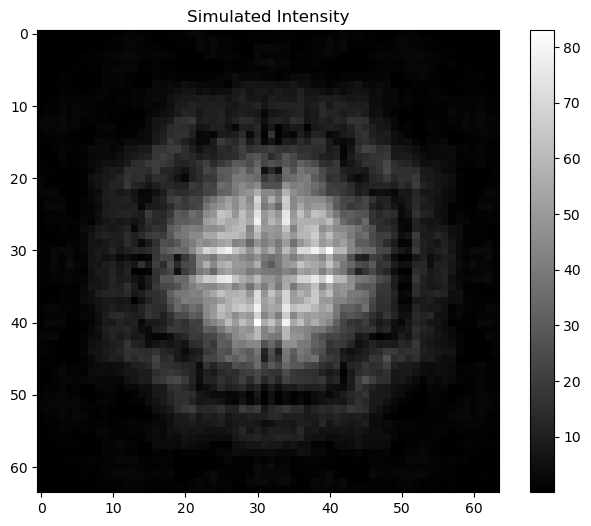

In [11]:
plt.figure(figsize=(8, 6))
# plt.title('Simulated Intensity')
plt.imshow(simulated_intensity, cmap='gray')
plt.colorbar()
plt.show()

In [23]:
def project_with_phase_plate(source_field, phase_plate, distance, wavelength, size, X, Y):
    X, Y = np.meshgrid(np.linspace(-grid_length, grid_length, size), np.linspace(-grid_length, grid_length, size))
#     X, Y = np.meshgrid(x, y)
    # x = np.linspace(-grid_length / 2, grid_length / 2, size)
    # y = np.linspace(-grid_length / 2, grid_length / 2, size)

    # Apply phase plate
    

    # Propagate the modified field
    propagated_input_field = propagate(source_field, 5e-3, wavelength, size, X, Y)

    # modified_field = source_field * np.exp(1j * phase_plate)
    modified_field = propagated_input_field * np.exp(1j * phase_plate)
    
    propagated_image = propagate(modified_field, 60e-3, wavelength, size, X, Y)
    
    intensity_image = np.abs(propagated_image)**2
    # Return the propagated field (represents the image)
    return intensity_image

In [24]:
intensity_image = project_with_phase_plate(input_intensity, phase_plate, distance, wavelength, size, X, Y)


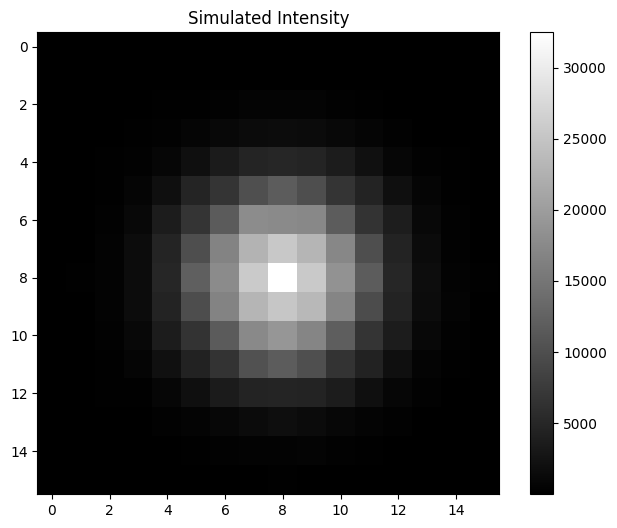

In [25]:
plt.figure(figsize=(8, 6))
plt.title('Simulated Intensity')
plt.imshow(intensity_image, cmap='gray')
plt.colorbar()
plt.show()

In [26]:
from skimage.metrics import structural_similarity as ssim

intensity_image_normalized = intensity_image / intensity_image.max()
target_intensity_normalized = target_intensity / target_intensity.max()

ssim_value = ssim(intensity_image_normalized, target_intensity_normalized, data_range=1.0)
print(f'Structural Similarity Index (SSIM): {ssim_value}')

Structural Similarity Index (SSIM): 0.3451120469054218


In [2]:
#A very small (and tropical) program in python to calculate the Fresnel Diffraction using the angular spectrum of plane waves
#####################################
#Programa para calcular la difracción de Fresnel mediante el espectro angular de ondas planas.
########################################
# Adrián Carbajal-Dominguez copyright 2018
#adrian.carbajal@ujat.mx
#
###########################################
##As start, lets import the necessary packages. Make sure you got them installed.

####Opencv is used to read the file image.
import cv2
#####Numpy  allows us to make the mathematical calculations.
import numpy as np
########## Matplotlib permits to show the results as an image.
from matplotlib import pyplot as plt

###Read the image. Make sure it is a squared one (same number of rows and cols).
img=cv2.imread('cuadrito.jpg',0)
#Detect the image size just for precaution (Optional).
#print (img.shape)
####Define the size of the propagation function p(u,v). It has to be of the same size of the image.
n1=200
n2=200
###Define the distance of observation z
Z=40
#Define a scale factor for the coordinates
h=10
##Define the wavelenght. 
l_ambda=0.01
##Define the angular spectrum coordinates
u = np.arange(-n1, n1, 1)
v = np.arange(-n2, n2, 1)
U,V = np.meshgrid(u,v)

#Define the propagation matrix
propagator=np.exp(2*np.pi*1j*(Z/h)*np.sqrt((1/l_ambda)**2-(U/10)**2-(V/10)**2))
#### Compute the Fast Fourier Transform of the image
f=np.fft.fft2(img)
##Correct the low and high frequencies
fshift=np.fft.fftshift(f)
##multiply both matrices: Fourier transform and propagator matrices.
field=fshift*propagator
##Calculate the inverse Fourier transform
field2=np.fft.ifft2(field)

#Define a coefficient to scale the intensity
v=1e10
##########Calculate and log scale the field intensity
diffracted_field=20*np.log(np.abs(field2)+v)
##Defien the size of the images to display in the jupyter notebook
plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
## Plot and show the image and the result
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Amplitude Boundary Condition'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(diffracted_field, cmap = 'plasma')
plt.title('Diffracted Field'), plt.xticks([]), plt.yticks([])
###Show the image
plt.show()

####Resist.

ModuleNotFoundError: No module named 'cv2'